In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('bhp.csv')

In [2]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [5]:
min_price,max_price = data['price_per_sqft'].quantile([0.05,0.95])

In [6]:
min_price

3107.8500000000004

In [7]:
max_price

15312.099999999984

In [8]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [10]:
df = data[(min_price<data['price_per_sqft']) & (data['price_per_sqft']<max_price)]

In [11]:
df.shape

(11880, 7)

In [18]:
df['Z Score'] = (df['price_per_sqft']-df['price_per_sqft'].mean())/df['price_per_sqft'].std()

C:\Users\phani\AppData\Local\Temp\ipykernel_26560\1591904547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z Score'] = (df['price_per_sqft']-df['price_per_sqft'].mean())/df['price_per_sqft'].std()


In [19]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z Score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.971995
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.606428
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.730146
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,0.044091
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.752096
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,0.157832
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.221288
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.986069
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.349812


In [20]:
df[(-4>df['Z Score']) | (df["Z Score"]>4)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z Score


In [15]:
new_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z Score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.013027
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945


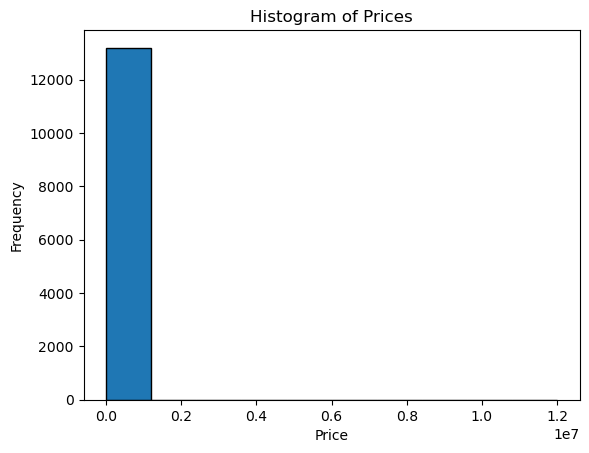

In [17]:
plt.hist(data['price_per_sqft'], bins=10, edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()